## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

This study aims to investigate if there is a connection between childhood family structure and adult socioeconomic and family outcomes by utilizing data from the General Social Survey (GSS). The GSS is a nationwide survey conducted every two years since the early 1970s among adults within the United States. The data that is collected includes demographic information, family characteristics, education level, income level, and social opinions.

The main interest is on whether childhood family environment has a connection with adult outcomes. To analyze childhood environment, I used data that indicated whether or not a respondent lived with two parents at the age of 16, along with data that indicated parental education level and parental occupational SES. These are common indicators used to measure childhood SES, as they reflect access to economic, education, and social resources. Living with two parents at age 16 is a common measure used to indicate a more stable environment.

In the case of adult outcomes, they will be education level achieved, inflation-adjusted income level, marital status, and the number of children born to each adult. These adult outcomes will cover all aspects of economic and family life in adulthood. In other words, education level and income level will measure socioeconomic status in adulthood, while the number of children will measure adult family status. Examining adult outcomes in relation to childhood will offer a way to explore the relationship between childhood family structure and adult socioeconomic and family status.

In addition to these adult and childhood variables, demographic variables like age and sex will be added to offer context and to control for basic differences in the population being studied. The age of the adults will be important in the dataset because it spans many survey years; hence, different generations will be included in the dataset with different backgrounds in terms of their age groups. The sex of each adult will be added to recognize possible differences in adult status based on sex.


In [3]:
import pandas as pd

gss = pd.read_excel("data/GSS.xlsx")

gss.head()
gss.shape
gss.columns

Index(['year', 'id_', 'marital', 'childs', 'age', 'educ', 'paeduc', 'maeduc',
       'sex', 'family16', 'realinc', 'pasei10'],
      dtype='object')

In [12]:
# Task 3: Load and clean GSS data for EDA

## Data Loading and Cleaning

'''The data were loaded from an Excel extract downloaded from the General Social Survey (GSS) Data Explorer.
Missing values encoded as negative numeric codes or string placeholders were replaced with NaN.
Education variables were recorded as categorical strings (e.g., "12th grade", "4 years of college")
and were converted into numeric years of education by parsing grade levels and college attendance.'''

import pandas as pd
import numpy as np

# Load data

gss = pd.read_excel("data/GSS.xlsx")


# Standardize missing values
# GSS numeric missing codes
missing_codes = [-1, -2, -3, -4, -5, -6, -7, -8, -9]
gss = gss.replace(missing_codes, np.nan)

# GSS string-based missing placeholders (if present)
placeholder_values = {
    '.n:  No answer': np.nan,
    '.s:  Skipped on Web': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.i:  Inapplicable': np.nan
}
gss = gss.replace(placeholder_values)


# Selecting variables for analysis
analysis_vars = [
    'year', 'id_', 'marital', 'childs', 'age',
    'educ', 'paeduc', 'maeduc', 'sex',
    'family16', 'realinc', 'pasei10'
]

gss_analysis = gss[analysis_vars].copy()


# Converting clearly numeric columns
numeric_cols = ['childs', 'age', 'realinc', 'pasei10', 'year']
for col in numeric_cols:
  gss_analysis[col] = pd.to_numeric(gss_analysis[col], errors='coerce')


#Convert education variables from strings to years
def education_to_years(val):
    if pd.isna(val):
        return np.nan

    val = str(val).lower().strip()

    # Match grade levels (e.g., "10th grade")
    grade_match = re.search(r'(\d+)\s*(st|nd|rd|th)?\s*grade', val)
    if grade_match:
        return float(grade_match.group(1))

    # Match years of college (e.g., "4 years of college")
    college_match = re.search(r'(\d+)\s*year', val)
    if college_match and 'college' in val:
        return 12.0 + float(college_match.group(1))

    return np.nan

for col in ['educ', 'paeduc', 'maeduc']:
    gss_analysis[col] = gss_analysis[col].apply(education_to_years)


# recode childhood family structure
gss_analysis['two_parent_home'] = (gss_analysis['family16'] == 1)


# Prepare income variable
gss_analysis['log_realinc'] = np.where(
    gss_analysis['realinc'] > 0,
    np.log(gss_analysis['realinc']),
    np.nan
)

# checking
print("Dataset shape:", gss_analysis.shape)
print("\nData types:")
print(gss_analysis.dtypes)

print("\nMissing values by column:")
print(gss_analysis.isna().sum())

gss_analysis.head()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Dataset shape: (75699, 14)

Data types:
year                 int64
id_                  int64
marital             object
childs             float64
age                float64
educ               float64
paeduc             float64
maeduc             float64
sex                 object
family16            object
realinc            float64
pasei10            float64
two_parent_home       bool
log_realinc        float64
dtype: object

Missing values by column:
year                   0
id_                    0
marital               66
childs              1324
age                 1307
educ                2416
paeduc             24568
maeduc             14454
sex                  131
family16            1562
realinc                0
pasei10                0
two_parent_home        0
log_realinc         7856
dtype: int64


,year,id_,marital,childs,age,educ,paeduc,maeduc,sex,family16,realinc,pasei10,two_parent_home,log_realinc
0,1972,1,Never married,0.0,23.0,16.0,10.0,NaN,FEMALE,Father only,18951.0,62.0,False,9.849612
1,1972,2,Married,5.0,70.0,10.0,8.0,8.0,MALE,"Other arrangement with relatives (e.g., aunt a...",24366.0,67.7,False,10.100944
2,1972,3,Married,4.0,48.0,12.0,8.0,8.0,FEMALE,Both own parents,24366.0,31.6,False,10.100944
3,1972,4,Married,0.0,27.0,17.0,16.0,12.0,FEMALE,Both own parents,30458.0,69.3,False,10.324104
4,1972,5,Married,2.0,61.0,12.0,8.0,8.0,FEMALE,Both own parents,50763.0,38.3,False,10.834923


               educ        realinc        childs       pasei10
count  73283.000000   75699.000000  74375.000000  75699.000000
mean      12.936848   29148.557015      1.824847     13.966021
std        2.946258   30510.147723      1.613581     61.611519
min        1.000000    -100.000000      0.000000   -100.000000
25%       12.000000    8308.000000      0.000000     18.600000
50%       12.000000   21285.000000      2.000000     35.800000
75%       15.000000   38373.750000      3.000000     50.300000
max       19.000000  162607.000000      7.000000     93.700000
                      educ       realinc    childs
two_parent_home                                   
False            12.936848  29148.557015  1.824847


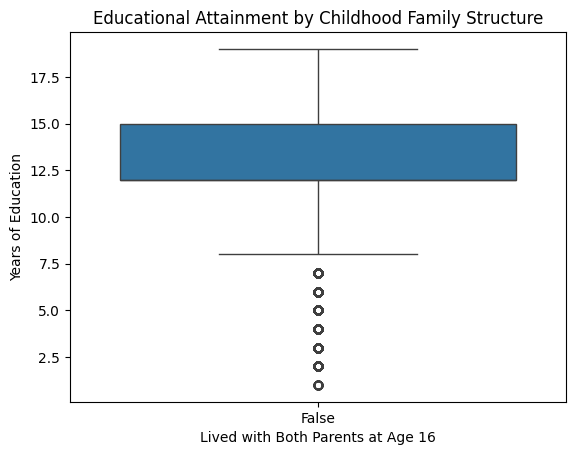

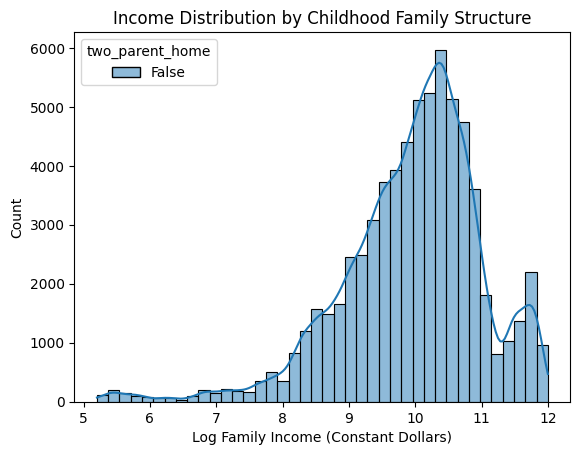

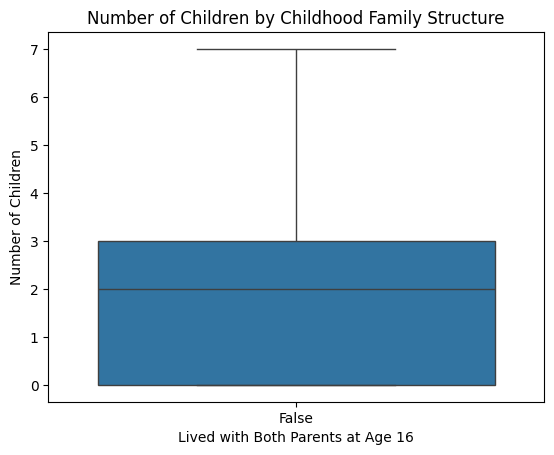

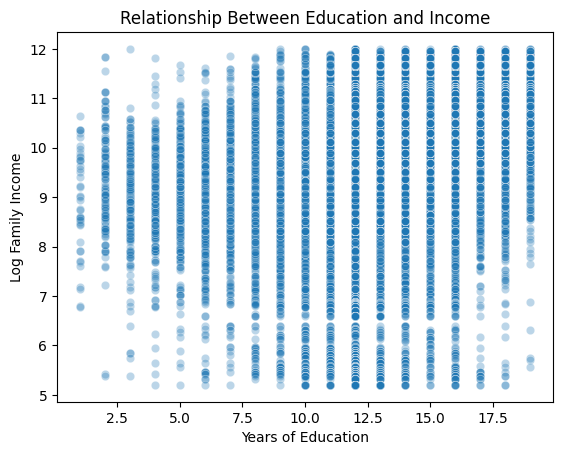

In [15]:
# Task 4 -- Summaries & Visualization
'''This section explores descriptive statistics & visuals to explore relationships between childhood family structure & adult socioeconomic/family outcome.'''

#overall summaries (means, medians; spread; min/max)
print(gss_analysis[['educ', 'realinc', 'childs', 'pasei10']].describe())

# Grouped summaries
print(gss_analysis.groupby('two_parent_home')[['educ', 'realinc', 'childs']].mean())



# First visual: Edu. by family structure
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=gss_analysis,
    x='two_parent_home',
    y='educ'
)

plt.xlabel("Lived with Both Parents at Age 16")
plt.ylabel("Years of Education")
plt.title("Educational Attainment by Childhood Family Structure")
plt.show()


# Income Distribution
sns.histplot(
    data=gss_analysis,
    x='log_realinc',
    hue='two_parent_home',
    bins=40,
    kde=True
)

plt.xlabel("Log Family Income (Constant Dollars)")
plt.title("Income Distribution by Childhood Family Structure")
plt.show()


# Family outcome
sns.boxplot(
    data=gss_analysis,
    x='two_parent_home',
    y='childs'
)

plt.xlabel("Lived with Both Parents at Age 16")
plt.ylabel("Number of Children")
plt.title("Number of Children by Childhood Family Structure")
plt.show()


# income & edu relationship
sns.scatterplot(
    data=gss_analysis,
    x='educ',
    y='log_realinc',
    alpha=0.3
)

plt.xlabel("Years of Education")
plt.ylabel("Log Family Income")
plt.title("Relationship Between Education and Income")
plt.show()

If we look at the overall statistics for the main variables, some interesting trends can be noted. First, in the case of education (educ), the average number of years of education is about 12.9, which is almost the completion of high school. The median is 12 years of education, so at least half of the people in the population have a high school education or lower. Education levels also vary a great deal, with a standard deviation of about 3 years. Education levels can be very low, with some people having almost 19 years of education.

For real household income (realinc), the average is about $29,148, while the median is lower at about $21,285. This shows that the income levels in the population are right-skewed, meaning a few people in the population have higher incomes. Also, the large standard deviation of about $30,510 shows that there is a great deal of variation in the income levels of the people in the population.

The number of children (childs) shows that people have, on average, about 1.8 children, with a median of 2. The number of children also varies a great deal, with a minimum of 0 and a maximum of 7. The standard deviation of 1.6 shows moderate variation.

The parental socioeconomic index (pasei10) has a mean of approximately 14.0 and a median of 35.8. These data suggest a skewed distribution. Most data points tend to cluster in a middle range, but the large standard deviation indicates significant variation in the level of parental socioeconomic status for the data set as a whole.

The box plot labeled “Educational Attainment by Childhood Family Structure” displays the education years for people who lived with both parents at the age of 16 and people who did not live with both parents. The data show that the level of education for both groups is approximately 12 years. In the United States, a level of education equivalent to 12 years is a high school education. The data for education level for both groups appear to be similar. Grouped data also show that the average level of education is approximately the same for people who lived with both parents and people who did not live with both parents.

The histogram for the data set on the log-transformed household income (log_realinc) indicates that income is slightly skewed to the right for people who lived with both parents and people who did not live with both parents. The overall shape of the income distributions for both groups appears very similar, with no clear differences in the center or spread of the data. This suggests that growing up in a two-parent household does not appear to be strongly associated with differences in adult household income based on this visualization alone. The grouped summary statistics further support this observation, as the average household income is nearly identical for both groups.

The box plot titled “Number of Children by Childhood Family Structure” shows the distribution of the number of children for individuals based on whether they lived with both parents at age 16. The median number of children is about 2 for both groups, and the interquartile ranges are also quite similar. Both groups contain outliers representing individuals with larger numbers of children, but these outliers appear in similar proportions for people from two-parent households and those from other family structures. The grouped summary statistics confirm this pattern, showing that the average number of children is approximately the same for both groups.

Overall, the numeric summaries and visualizations suggest that there are no substantial differences in adult educational attainment, household income, or number of children based solely on whether an individual lived with both parents at age 16. While there is natural variation within each group, the similarities in means, medians, and distributions indicate that childhood family structure, by itself, does not strongly differentiate these adult outcomes in this dataset. Additional statistical analysis would be needed to determine whether any small differences observed are statistically meaningful.